In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install pygeos
!pip install topojson
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
#!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
#!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

In [3]:
eff = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')

In [ ]:
eff.shape

In [ ]:
eff

In [ ]:
len(eff['patho_niv1'].unique())


In [ ]:
len(eff['cla_age_5'].unique())

In [ ]:
#On a 4 valeurs pour la variable sexe
len(eff['sexe'].unique())

In [ ]:
eff['sexe'].isin([1.0, 2.0]).sum()

In [ ]:
eff['sexe'].eq(9.0).sum()

In [ ]:
#On regroupe toutes les valeurs inconnues
#On n'a plus que 3 valeurs possibles pour sexe
eff['sexe'].replace(9.0, np.nan, inplace=True)

In [ ]:
len(eff['sexe'].unique())

In [ ]:
#Diagramme en barres sur le nombre de cas par type de maladie

# Compter le nombre de cas par type de maladie
counts = eff['patho_niv1'].value_counts()

# Créer le diagramme en barres
plt.bar(counts.index, counts.values,  width=0.6)
plt.xlabel('Type de maladie')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par type de maladie')

# Ajouter des lignes horizontales en arrière-plan
for y in range(0, max(counts.values) + 1, 50000):  # Ajuster l'espacement des lignes selon vos besoins
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5)

# Rotation des étiquettes en diagonale
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#Cela pourrait être pas mal de faire un diagramme sur la proportion
# de la population de chaquee département/région qui a été touchée par une des telles maladies
#mais pour cela il faudrait la population totale de chaque département

In [ ]:
#Diagramme en barre pour le nombre de malades en fonction du sexe
#On ne voit pas de différence à cause de l'échelle
#sélectionner qq colonnes et "zoomer"
#en fait les résultats affichés me paraissent louches

# Compter le nombre de cas par type de maladie et par genre
counts = eff.groupby(['patho_niv1', 'libelle_sexe']).size().unstack(fill_value=0)

# Créer le diagramme en barres
ax = counts.plot(kind='bar', stacked=False)

# Ajouter des lignes horizontales dans l'arrière-plan
for y in range(50, max(counts.max())+1, 50000):
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Orienter le texte sur l'axe des x 
plt.xticks(rotation=45, ha='right')


plt.xlabel('Type de maladie')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par type de maladie chez les individus par genre')
plt.legend(title='Genre', loc='upper right')

plt.show()


In [ ]:
# Maladies les plus répandues chez les hommes

patho_niv3_counts = eff[eff['sexe'] == 1.0]['patho_niv2'].value_counts()

# Sélectionner les 10 maladies les plus répandues
top_10_maladies = patho_niv3_counts.head(10)

# Calculer le pourcentage d'hommes ayant contracté chaque maladie parmi l'ensemble de la population soignée
pourcentages = (top_10_maladies / len(eff[eff['sexe'] == 1.0])) * 100

# Créer le graphique en barres
pourcentages.plot(kind='bar', color='mediumaquamarine')


plt.xlabel('Type de maladie (patho_niv2)')
plt.ylabel('Parmi ceux qui ont reçu des soins,\n pourcentage d\'hommes concerné par la maladie')
plt.title('Les 10 maladies les plus répandues chez les hommes')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# il y a autant de personnes pour chaque classe d'âge comme le montre le graph
# faire attention à l'interprétation causale !!!!

# Compter le nombre d'individus par tranche d'âge
age_counts = eff['cla_age_5'].value_counts()

# Calculer la proportion d'individus dans chaque tranche d'âge
age_proportions = age_counts / age_counts.sum()

# Trier les proportions par index (tranches d'âge) en ordre croissant
age_proportions = age_proportions.sort_index()

# Créer le diagramme en barres
ax = age_proportions.plot(kind='bar', color='green')

# Ajouter des étiquettes aux barres
for i, proportion in enumerate(age_proportions):
    ax.text(i, proportion + 0.01, f'{proportion:.2%}', ha='center', va='bottom')

plt.xlabel('Tranche d\'âge')
plt.ylabel('Proportion d\'individus')
plt.title('Proportion d\'individus dans chaque tranche d\'âge')
plt.show()


In [ ]:
#valide le fait qu'il y a autant d'indiv dans chaque classe d'âge
for x in eff['cla_age_5'].unique():
   print(x, eff['cla_age_5'].eq(x).sum())

In [ ]:
data_pollution = pd.read_csv("base_pollution.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [ ]:
data_pollution

In [ ]:
pollution_group_dep = pd.read_csv("pollution_group_dep.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [ ]:
pollution_group_reg = pd.read_csv("pollution_group_reg.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [ ]:
pollution_group_dep

In [ ]:
pollution_group_reg

In [ ]:
# Sommez les colonnes 3 à 12 pour chaque région
pollution_agregee = pollution_group_reg.groupby('Nom de la région').sum().iloc[:, 1:11]

# Créez un histogramme
pollution_agregee.plot(kind='bar', stacked=True)
plt.xlabel('Nom de la région')
plt.ylabel('Niveau agrégé de pollution')
plt.title('Niveau agrégé de pollution par région')
plt.legend(title='Variables de pollution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
x = input("Entrer un numéro de département (mettre un 0 devant si c'est un chiffre) : ")

In [ ]:
# Sélectionnez les données pour le département x
pollution_dep_91 = pollution_group_dep[pollution_group_dep['DEP'] == x]

# Sélectionnez les colonnes correspondant aux sources de pollution
sources_pollution = pollution_dep_91.columns[1:10]

# Créez un diagramme en barres
plt.bar(sources_pollution, pollution_dep_91.iloc[0, 1:10])
plt.xlabel('Sources de pollution')
plt.ylabel('Niveau de pollution')
plt.title('Niveau de pollution par source pour le département {}'.format(x))
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
## Stat desc sur les maladies du foie

In [5]:
#Création d'une base avec des indicatrices
base_grande = eff
base_grande = base_grande.dropna()
base_grande = pd.get_dummies(base_grande, prefix = 'indicatrice_', columns=['patho_niv1'], dtype='int')

liste_var = base_grande.columns[17:]
liste_bis = []
for i in liste_var : 
    liste_bis.append(i)
indicatrice_patho_niv1 = liste_bis

liste_auxil = base_grande['cla_age_5'].unique()
inter_excl = ('95et+', 'tsage', np.nan)

inter_def = []
for i in liste_auxil :
    if i in inter_excl : 
        inter_def = inter_def
    else : 
        inter_def.append(i)
classe_age = []
for i in base_grande['cla_age_5'] : 
    if i in inter_def :
        temp = i.split('-')
        temp[0] = int(temp[0])
        temp[1] = int(temp[1])
        age = (temp[1] + temp[0])/2
    elif i == 'tsage' : 
        age = np.nan
    elif i == '95et+' : 
        age = 100
    else : 
        age = np.nan
    classe_age.append(age)
base_grande.loc[:,'classe_age'] = classe_age

In [6]:
base_grande

,annee,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,...,indicatrice__Maladies du foie ou du pancréas (hors mucoviscidose),indicatrice__Maladies inflammatoires ou rares ou VIH ou SIDA,indicatrice__Maladies neurologiques ou dégénératives,indicatrice__Maladies psychiatriques,indicatrice__Maladies respiratoires chroniques (hors mucoviscidose),indicatrice__Maternité (avec ou sans pathologies),indicatrice__Séjours en hospitalisation complète pour prise en charge de la Covid-19,indicatrice__Traitements du risque vasculaire (hors pathologies),indicatrice__Traitements psychotropes (hors pathologies),classe_age
0,2020,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,1.0,971,290.0,4210.0,...,0,0,0,0,0,0,0,1,0,82.0
1,2020,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,3.0,973,40.0,650.0,...,0,0,0,0,0,0,0,1,0,82.0
2,2020,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,4.0,999,410.0,5630.0,...,0,0,0,0,0,0,0,1,0,82.0
3,2020,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,6.0,999,20.0,350.0,...,0,0,0,0,0,0,0,1,0,82.0
4,2020,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11.0,75,2960.0,20820.0,...,0,0,0,0,0,0,0,1,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828346,2018,Autres affections neurologiques,Autres affections neurologiques,top_NAutres_ind,60-64,1.0,76.0,12,40.0,9230.0,...,0,0,1,0,0,0,0,0,0,62.0
828347,2018,Autres affections neurologiques,Autres affections neurologiques,top_NAutres_ind,60-64,1.0,76.0,48,20.0,2540.0,...,0,0,1,0,0,0,0,0,0,62.0
828348,2018,Autres affections neurologiques,Autres affections neurologiques,top_NAutres_ind,60-64,1.0,76.0,66,70.0,14820.0,...,0,0,1,0,0,0,0,0,0,62.0
828349,2018,Autres affections neurologiques,Autres affections neurologiques,top_NAutres_ind,60-64,1.0,84.0,15,20.0,5240.0,...,0,0,1,0,0,0,0,0,0,62.0


In [7]:
#Création d'une base sélectionnant les variables qui nous intéressent
model_foie_alpha = base_grande[['dept', 'classe_age','indicatrice__Maladies du foie ou du pancréas (hors mucoviscidose)','sexe','region']]

In [8]:
model_foie_alpha.columns = model_foie_alpha.columns.str.replace(' ', '_')

In [9]:
model_foie_alpha

,dept,classe_age,indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose),sexe,region
0,971,82.0,0,1.0,1.0
1,973,82.0,0,1.0,3.0
2,999,82.0,0,1.0,4.0
3,999,82.0,0,1.0,6.0
4,75,82.0,0,1.0,11.0
...,...,...,...,...,...
828346,12,62.0,0,1.0,76.0
828347,48,62.0,0,1.0,76.0
828348,66,62.0,0,1.0,76.0
828349,15,62.0,0,1.0,84.0


In [10]:
resultats = model_foie_alpha[model_foie_alpha['indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose)'] == 1].groupby('classe_age').size()
resultats
#exactement le même problème que pour la respiration même nombre 
#fixed

classe_age
2.0      211
7.0      179
12.0     220
17.0     355
22.0     443
27.0     425
32.0     455
37.0     478
42.0     524
47.0     473
52.0     491
57.0     500
62.0     477
67.0     475
72.0     447
77.0     474
82.0     515
87.0     509
92.0     455
100.0    300
dtype: int64

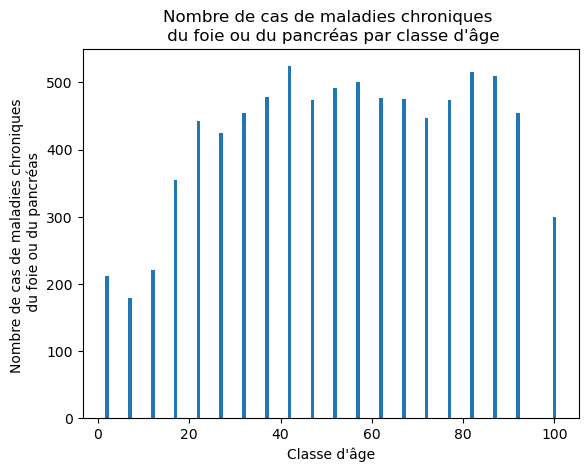

In [13]:
#Création de l'histogramme

# Filtrez les lignes où la colonne 'indicatrice__Maladies_respiratoires_chroniques_(hors_mucoviscidose)'
# est égale à 1
T_filtered = model_foie_alpha[model_foie_alpha['indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose)'] == 1]

# Agrégation par âge pour compter le nombre d'individus
agg_data = T_filtered.groupby('classe_age').size().reset_index(name='nombre_de_cas')

# Créez un histogramme
plt.bar(agg_data['classe_age'], height=agg_data['nombre_de_cas'])

# Ajoutez des étiquettes et un titre
plt.xlabel('Classe d\'âge')
plt.ylabel('Nombre de cas de maladies chroniques \n du foie ou du pancréas')
plt.title('Nombre de cas de maladies chroniques \n du foie ou du pancréas par classe d\'âge')

# Affichez l'histogramme
plt.show()

In [14]:
counts = model_foie_alpha['classe_age'].value_counts()
print(counts)

classe_age
67.0     26046
62.0     25891
72.0     25518
57.0     25452
77.0     24874
52.0     24652
82.0     24032
47.0     23386
87.0     23084
42.0     21498
92.0     20691
37.0     19693
32.0     18474
27.0     16821
100.0    16096
22.0     15565
17.0     14129
12.0     11220
7.0       9281
2.0       7294
Name: count, dtype: int64


In [ ]:
# Stat desc sur les maladies respiratoires

In [15]:
model_resp_alpha = base_grande[['dept', 'classe_age','indicatrice__Maladies respiratoires chroniques (hors mucoviscidose)','sexe','region']]

In [16]:
model_resp_alpha.columns = model_resp_alpha.columns.str.replace(' ', '_')

In [17]:
resultats = model_resp_alpha[model_resp_alpha['indicatrice__Maladies_respiratoires_chroniques_(hors_mucoviscidose)'] == 1].groupby('classe_age').size()
resultats

classe_age
2.0      465
7.0      478
12.0     461
17.0     452
22.0     497
27.0     453
32.0     498
37.0     443
42.0     458
47.0     471
52.0     475
57.0     487
62.0     477
67.0     491
72.0     511
77.0     510
82.0     512
87.0     464
92.0     481
100.0    501
dtype: int64

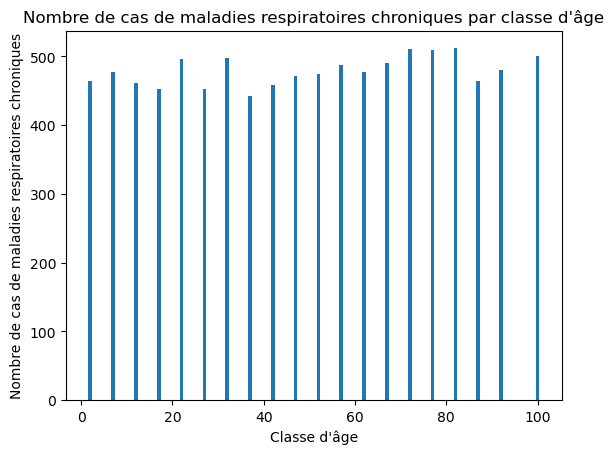

In [19]:
# Création de l'histogramme

# Filtrez les lignes où la colonne 'indicatrice__Maladies_respiratoires_chroniques_(hors_mucoviscidose)' est égale à 1
T_filtered = model_resp_alpha[model_resp_alpha['indicatrice__Maladies_respiratoires_chroniques_(hors_mucoviscidose)'] == 1]

# Agrégation par âge pour compter le nombre d'individus
agg_data = T_filtered.groupby('classe_age').size().reset_index(name='nombre_de_cas')

# Créez un histogramme
plt.bar(agg_data['classe_age'], height=agg_data['nombre_de_cas'])

# Ajoutez des étiquettes et un titre
plt.xlabel('Classe d\'âge')
plt.ylabel('Nombre de cas de maladies respiratoires chroniques')
plt.title('Nombre de cas de maladies respiratoires chroniques par classe d\'âge')

# Affichez l'histogramme
plt.show()

In [ ]:
## La suite est pour si on veut faire des stat desc sur le merge de table

In [ ]:
# Fusion des tables effectifs et pollution_group_dep
malades_et_pollution_dep = pd.merge(eff, pollution_group_dep, 
                    left_on=[eff['dept']], 
                    right_on=[pollution_group_dep['DEP']], 
                    how='inner').drop(columns=['key_0'])

In [ ]:
malades_et_pollution_dep

In [ ]:
# Fusion des tables effectifs et pollution_group_reg
#En cas de stat sur les corrélation entre pollution et maladie au niveau de la région
malades_et_pollution_reg = pd.merge(eff, pollution_group_reg, 
                    left_on=[eff['region']], 
                    right_on=[pollution_group_reg['REG']], 
                    how='inner').drop(columns=['key_0'])

In [ ]:
malades_et_pollution_reg